In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from future.types import no


In [2]:
# Load the HRPPD data from the provided CSV file
file_path = 'hrppd_24_qe_blue_2nd_measure1.csv'
hrppd_data = pd.read_csv(file_path, header=None)

# Display the first few rows of the data to understand its structure
hrppd_data.shape

(150, 125)

In [3]:
# Transpose it so Y now rows-index and X are columns-index
raw_data = hrppd_data.values.T
raw_data.shape

(125, 150)

In [4]:
def plot_channels(data, title=""):
    """Plotting the values of each channel over one another"""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Iterate through each column and plot its values against its row index
    for i in range(data.shape[0]):
        ax.plot(data[i, :], label=f'Y={i}')
    
    ax.set_title(title)
    ax.set_xlabel('X channel')
    ax.set_ylabel('Value')
    plt.show()

def plot_data_2d(data, title=""):
    """ Plots data as 2d"""
    plt.figure(figsize=(24, 16))
    plt.imshow(data, aspect='auto', cmap='viridis', origin='lower')
    plt.colorbar(label='Intensity')
    plt.title(title)
    plt.xlabel('Y Channel')
    plt.ylabel('X Channel')
    plt.show()

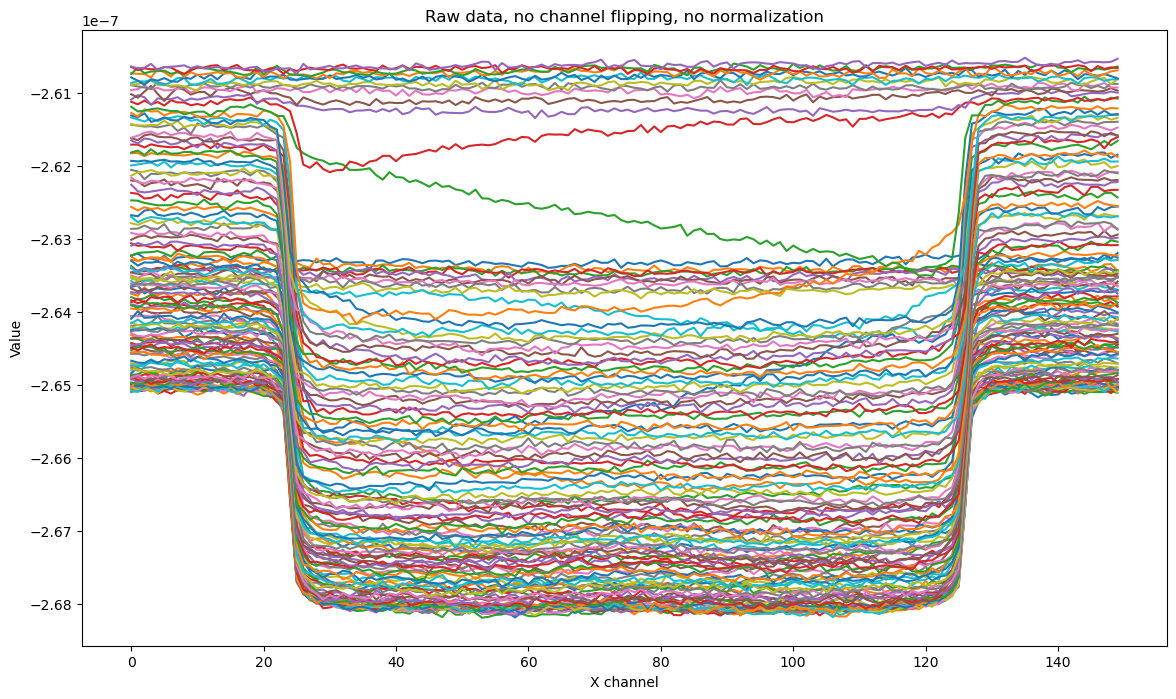

In [5]:
plot_channels(raw_data, "Raw data, no channel flipping, no normalization")

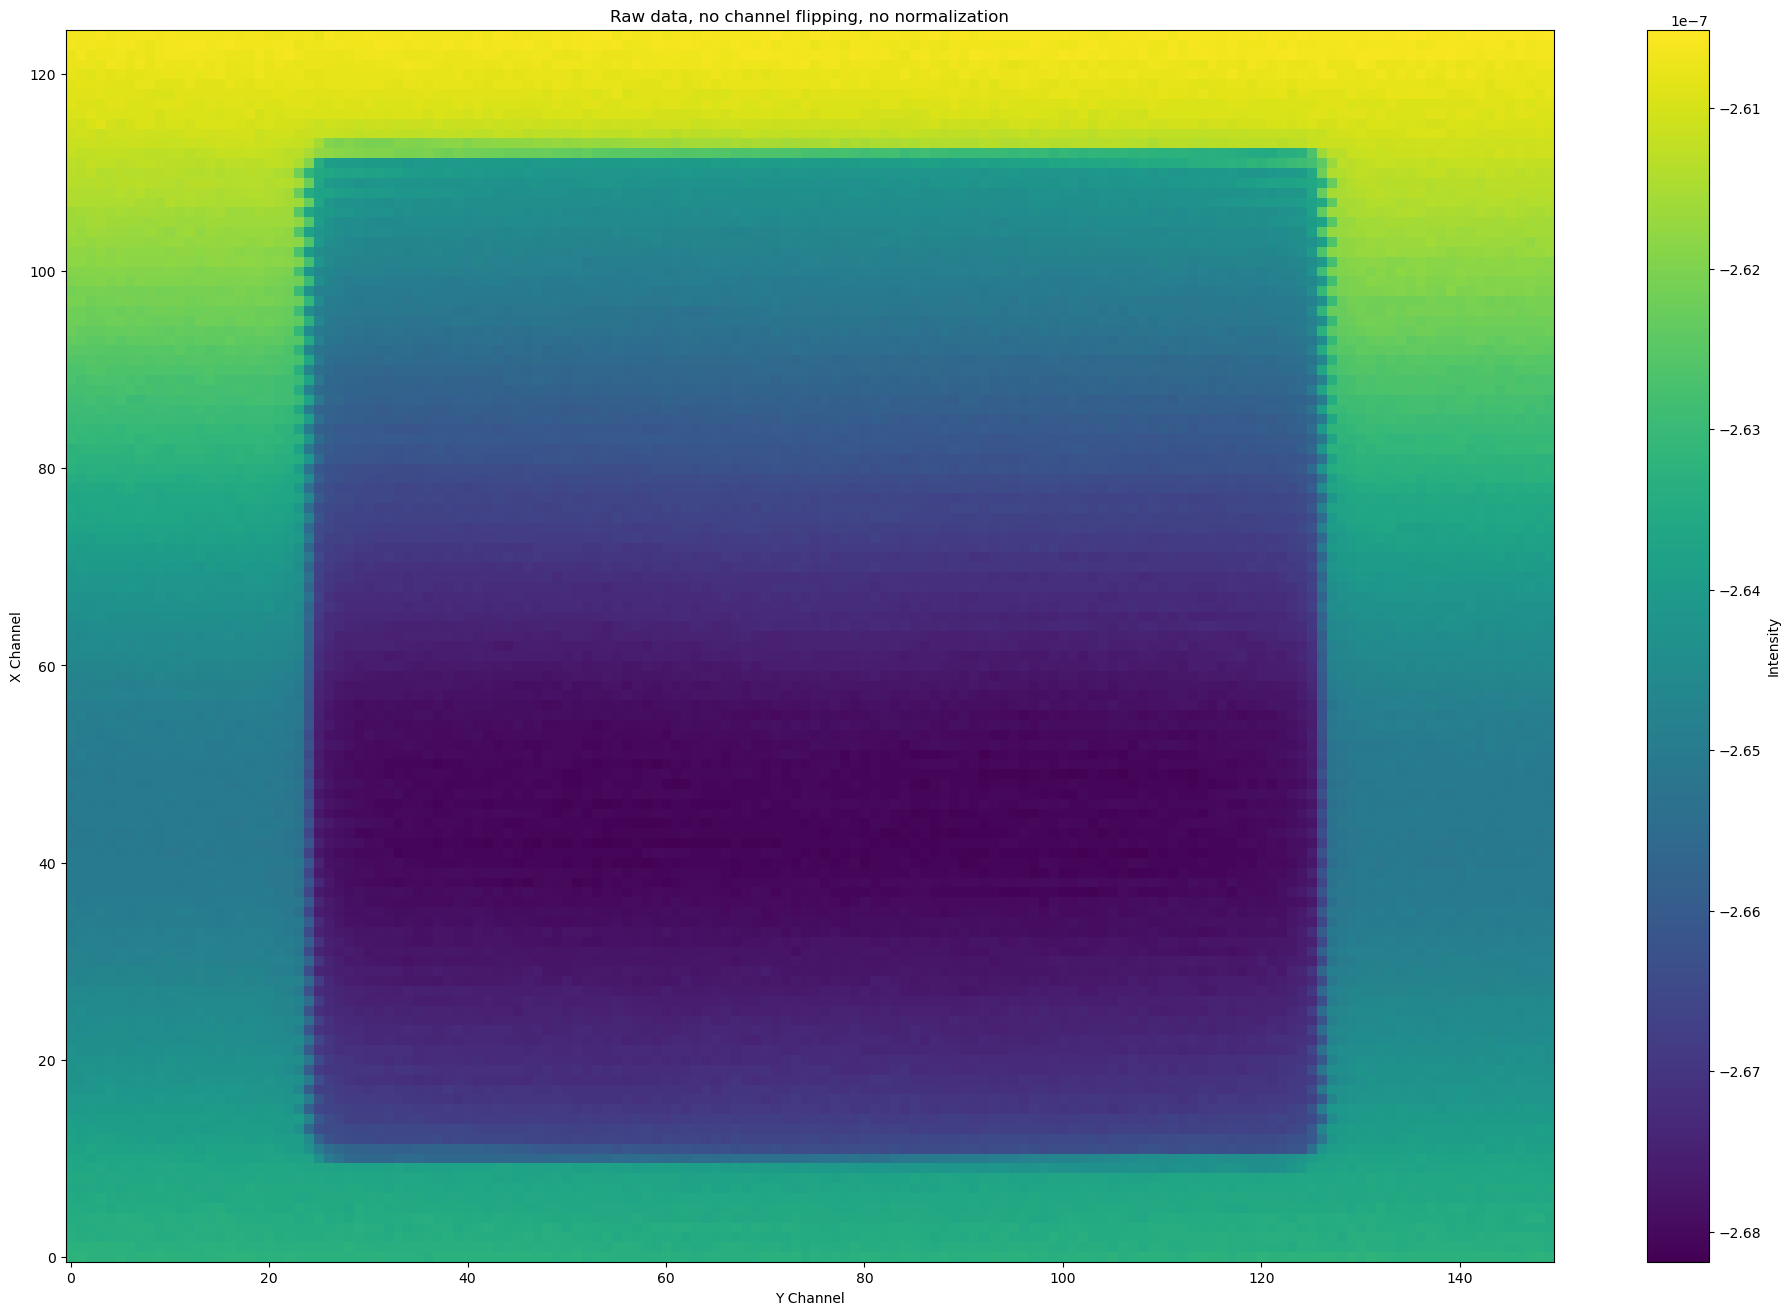

In [6]:
plot_data_2d(raw_data, "Raw data, no channel flipping, no normalization")

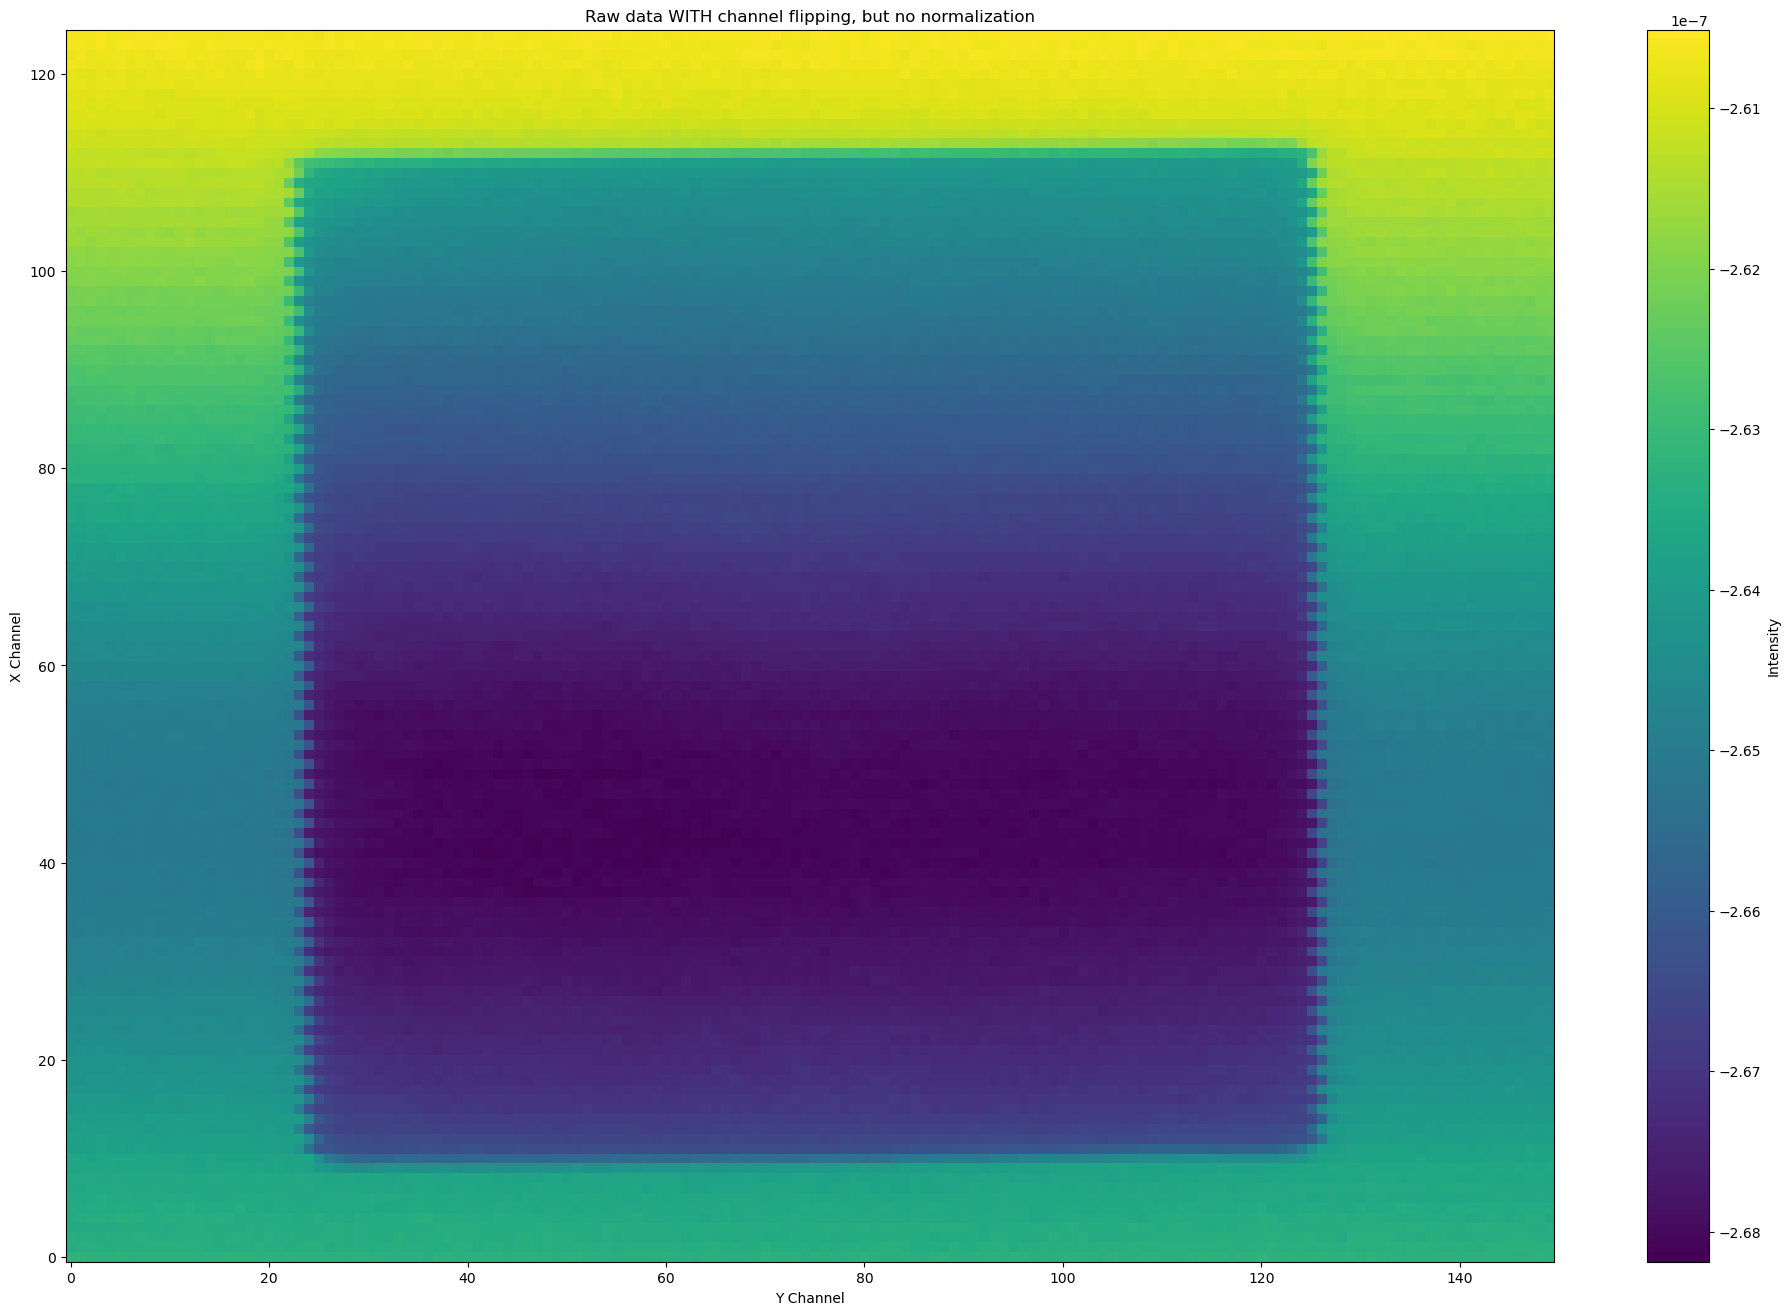

In [7]:
# Now flip data for each odd Y channel, handling snake scan nature of data taking

flip_data = np.copy(raw_data)

# Reverse the rows in each odd column to address the specified order
for i in range(1, raw_data.shape[0], 2):  # iterating over odd columns
    flip_data[i, :] = raw_data[i, :][::-1]

plot_data_2d(flip_data, "Raw data WITH channel flipping, but no normalization")

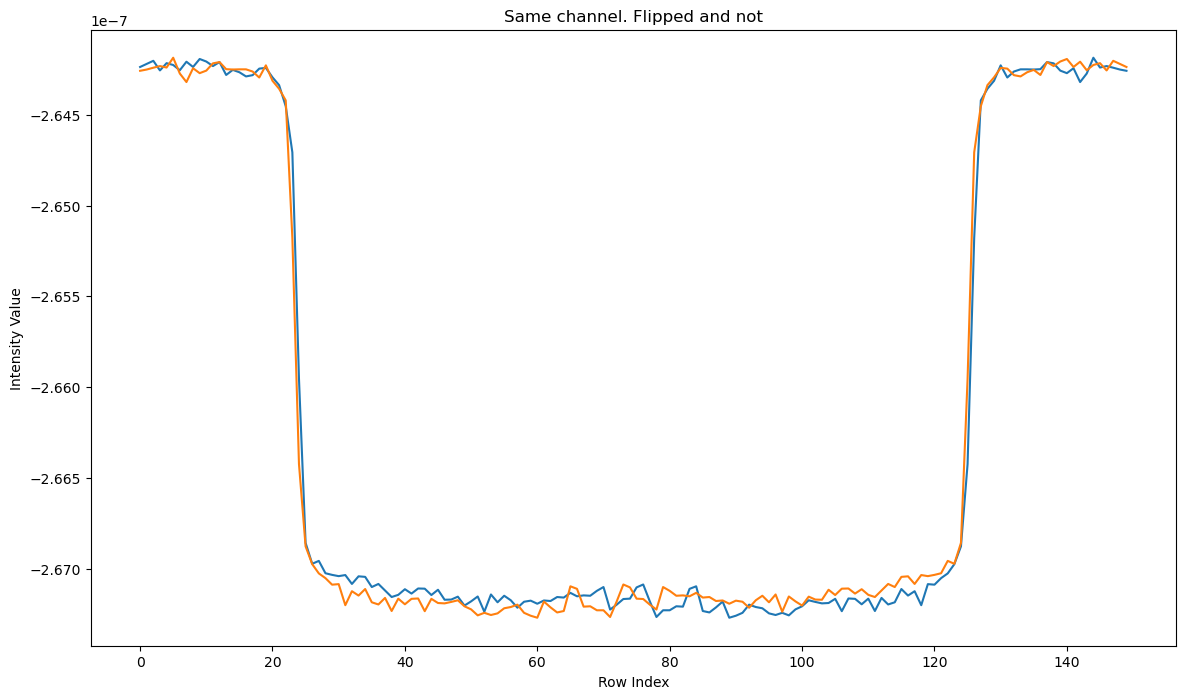

In [8]:

# HERE we check how channel flipping was done. Looks OK
# Plotting the values of each column over one another
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate through each column and plot its values against its row index
#for i in range(data_matrix.shape[0]):
ax.plot(raw_data[19, :], label=f'Y={i}')
ax.plot(flip_data[19, :], label=f'Y={i}')

ax.set_title('Same channel. Flipped and not')
ax.set_xlabel('Row Index')
ax.set_ylabel('Intensity Value')
plt.show()

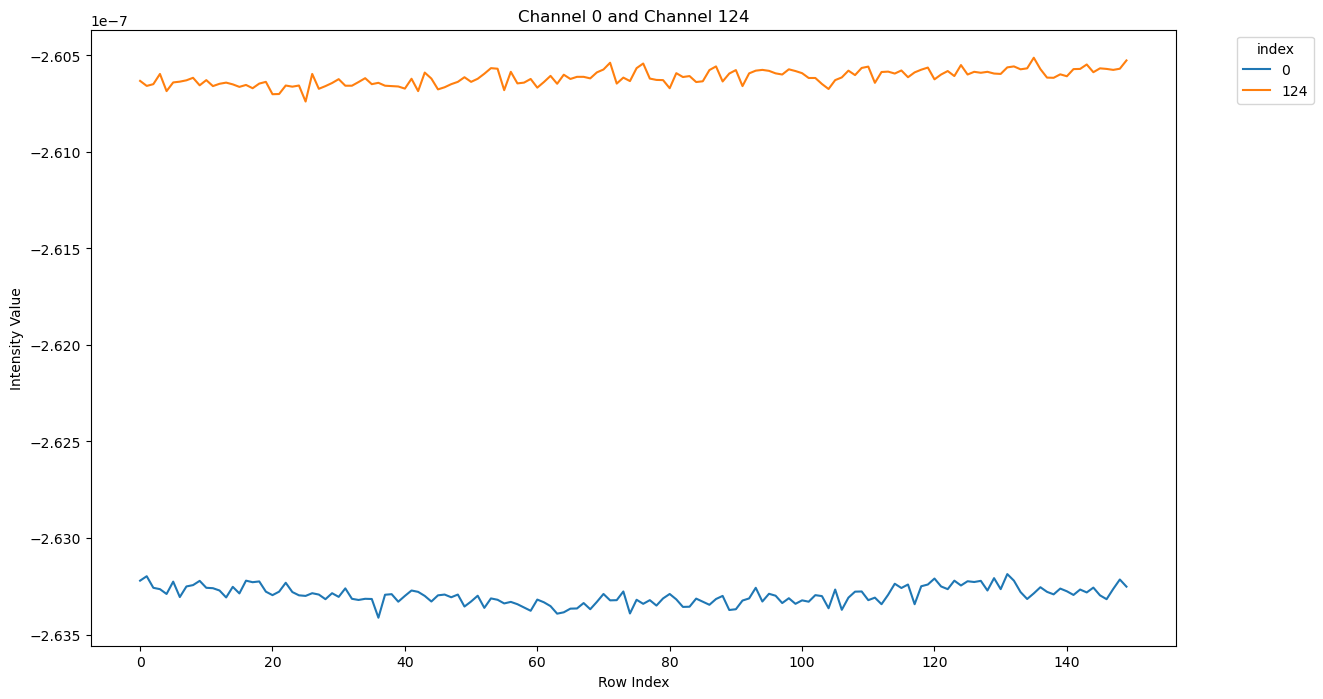

In [9]:
# Plotting first and last channel 
# Plotting the values of each column over one another
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate through each column and plot its values against its row index
#for i in range(data_matrix.shape[0]):
ax.plot(raw_data[0, :], label=f'0')
ax.plot(flip_data[124, :], label=f'124')

ax.set_title('Channel 0 and Channel 124')
ax.set_xlabel('Row Index')
ax.set_ylabel('Intensity Value')
ax.legend(title="index", bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [10]:
def edge_normalize(data, norm_index=0, edge_size = 10):
    """
    Normalizes data so rows values are on the same normalization level
    
    edge              edge
    ------            ------  - normalization level
          \          |
           \        |
            --------
            
    :data: 2d array where rows are Y and columns are X
    :norm_index: which channel to take as normalization value
    :edge_size: number of points from each side to treat as edge
                i.e.   how much points we take from each edge to calculate shift
    
    """
    norm_mean = np.mean(raw_data[norm_index, :])
    print(f"Normalizing on {norm_mean} at Y channel={norm_index}")

    # Iterate through each column and plot its values against its row index
    result = np.copy(data)
    for i in range(result.shape[0]):
        edges_combined = np.concatenate([result[i, :edge_size], result[i, -edge_size:]])
        edges_mean = np.mean(edges_combined)
        delta = edges_mean - norm_mean
        result[i, :] = result[i, :] - delta
    return result

Normalizing on -2.632962333333333e-07 at Y channel=0


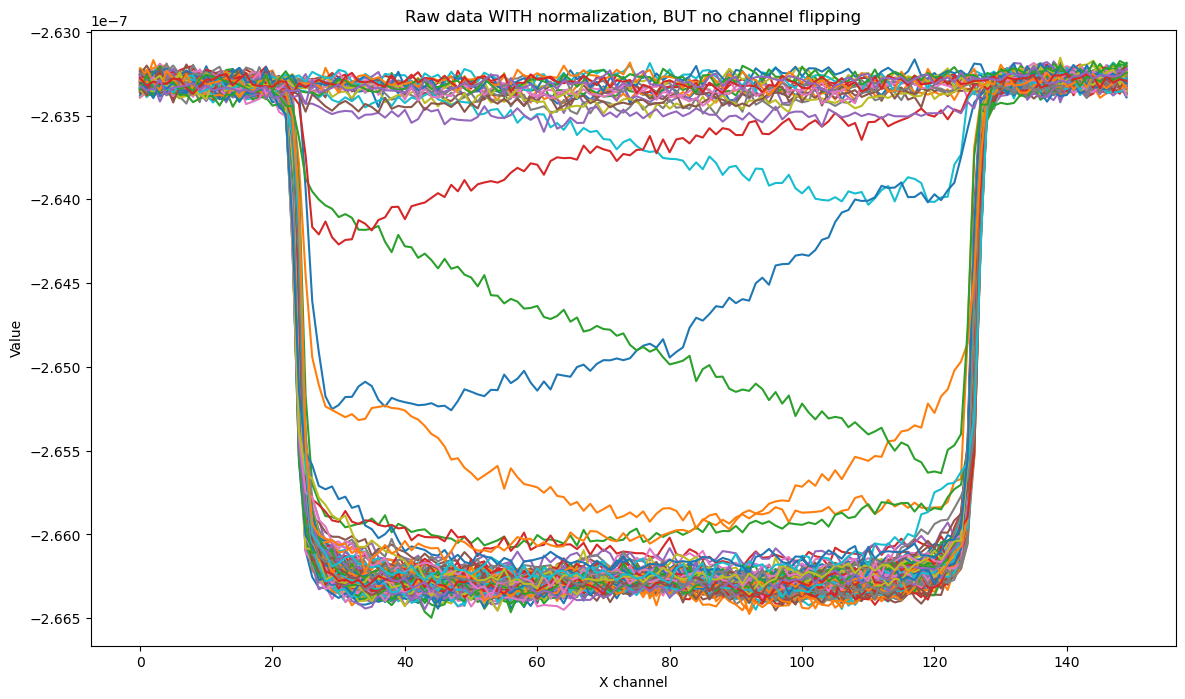

In [11]:
raw_data_norm = edge_normalize(raw_data)

# Plotting the values of each column over one another
plot_channels(raw_data_norm, "Raw data WITH normalization, BUT no channel flipping")


Normalizing on -2.632962333333333e-07 at Y channel=0


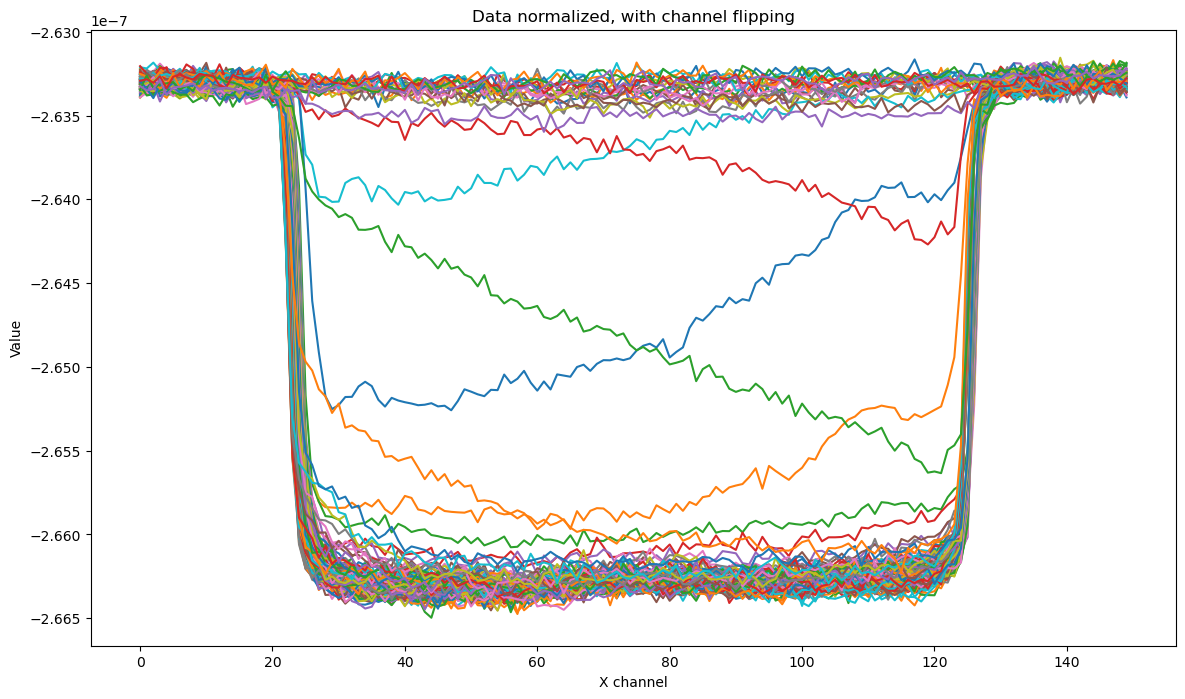

In [12]:
flip_data_norm = edge_normalize(flip_data)


# Plotting the values of each column over one another
plot_channels(flip_data_norm, "Data normalized, with channel flipping")

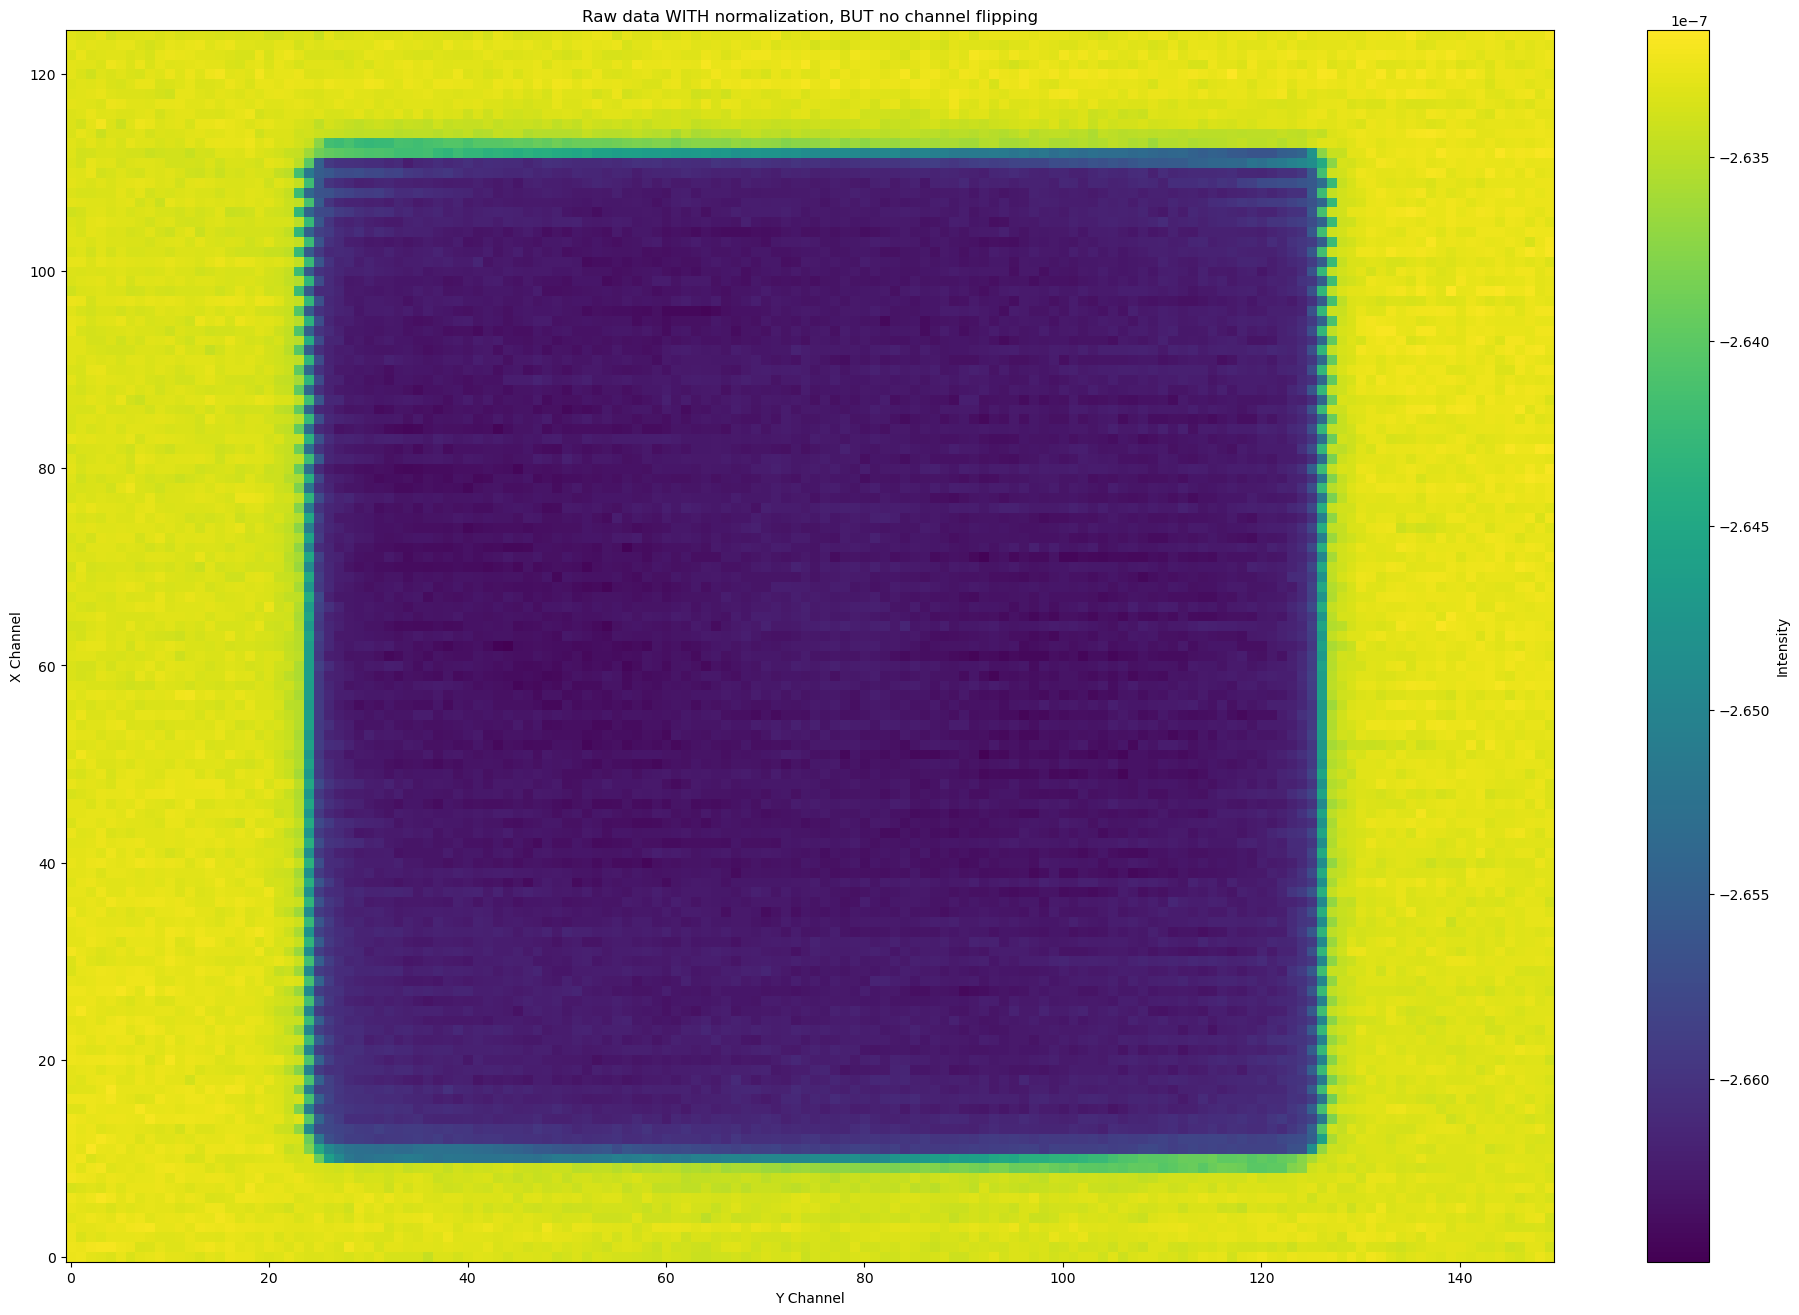

In [13]:
plot_data_2d(raw_data_norm, "Raw data WITH normalization, BUT no channel flipping")


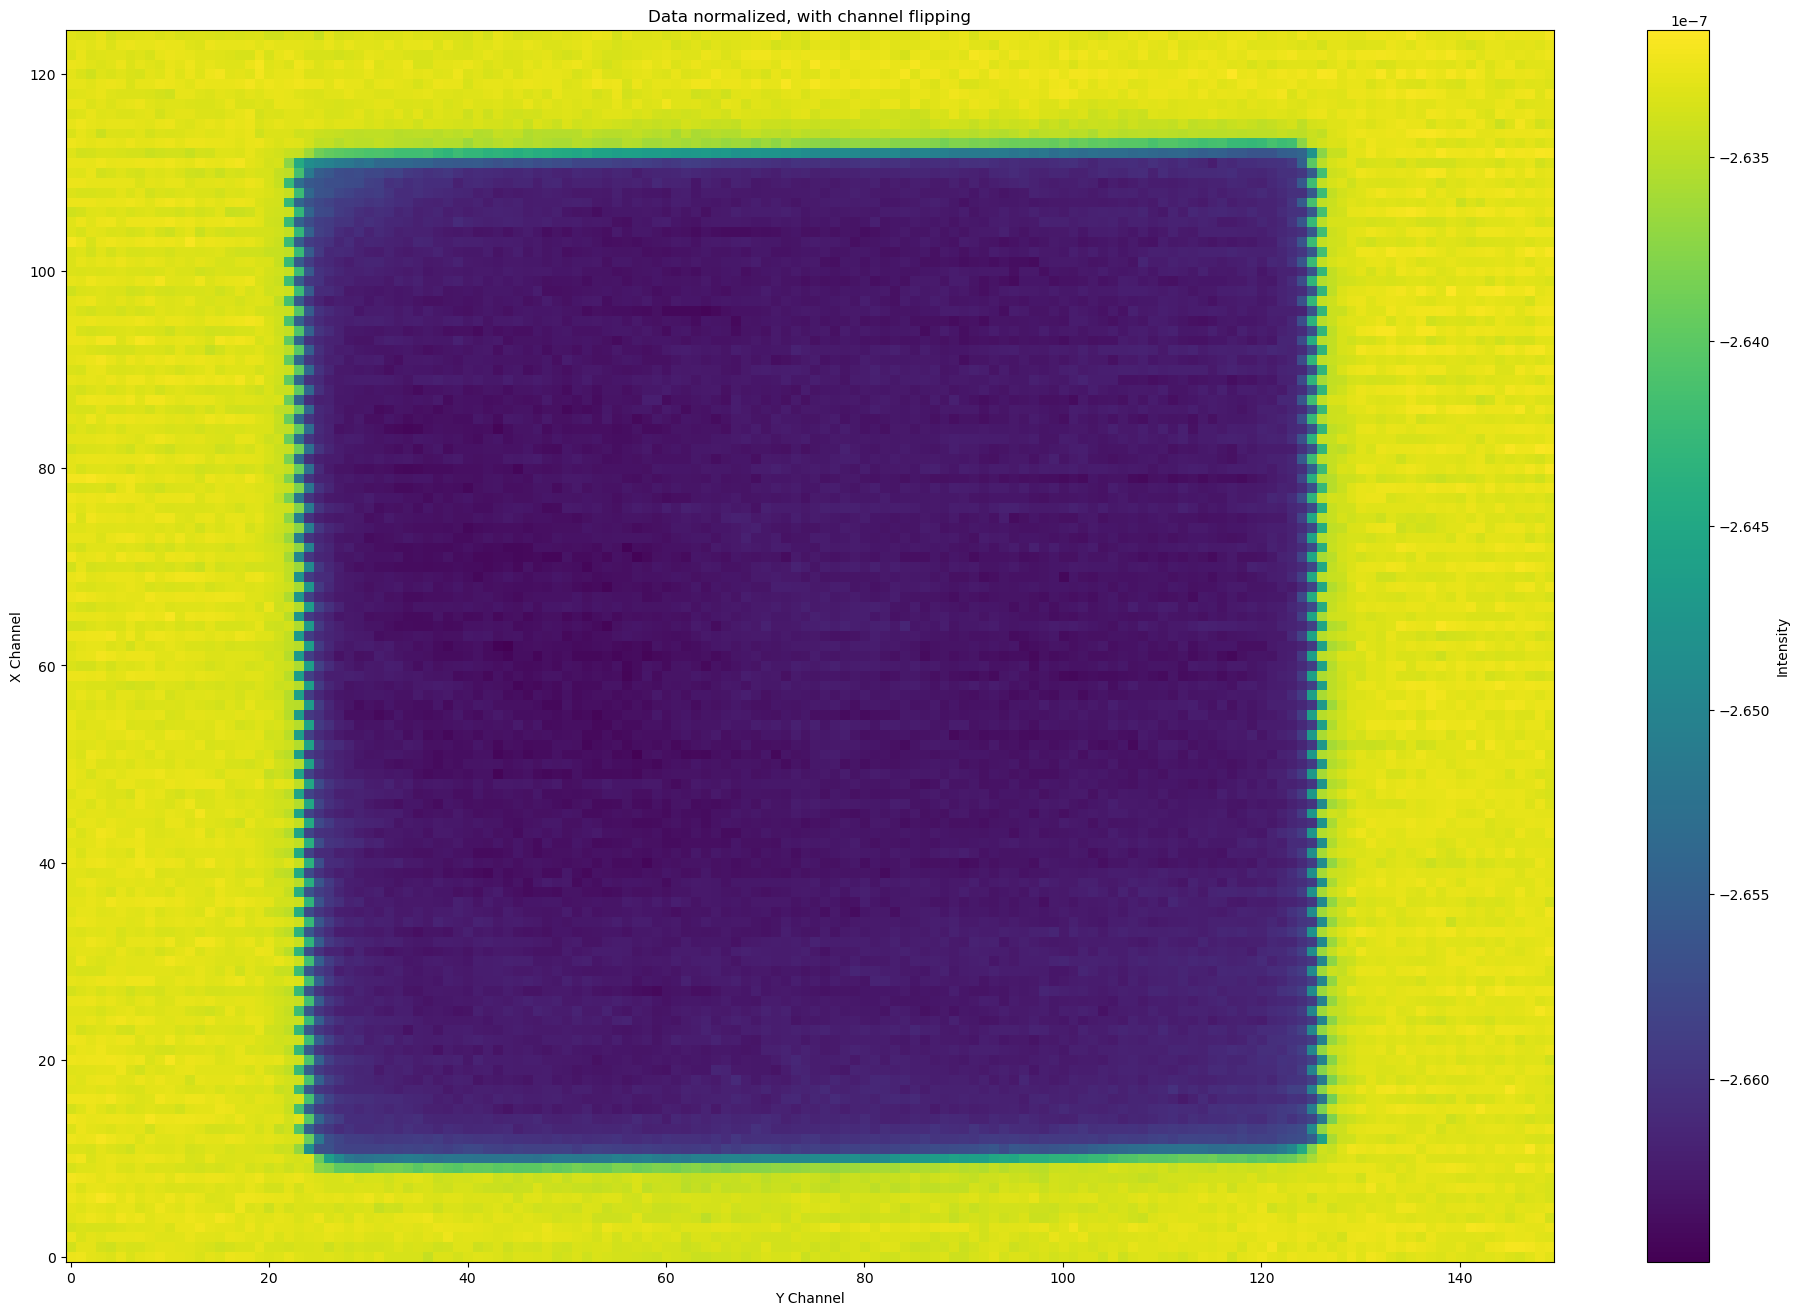

In [14]:
plot_data_2d(flip_data_norm, "Data normalized, with channel flipping")